In [202]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../dados/dados_totvs/dados_clientes.csv', sep=';')

In [204]:
df

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07
1,T00053,SMS COLAB NEO 2500 DOC,SMS TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,MANUFATURA - PARCEIRO,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,RJ,"341,155636978792",2015-02-27
2,T00053,HORA SUPORTE,CONSULTORIA TRADICIONAL,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,SERVICOS DE IMPLANTACAO,MODALIDADE SERVICOS NÃO RECORRENTES,105,00 - Mensal,CANCELADO,RJ,"45,3386017130146",1997-11-28
3,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07
4,T00053,PROGRESS USER 11 CDU,CDU TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,PROGRESS,MODALIDADE TRADICIONAL,105,00 - Mensal,TROCADO,RJ,"0,117708006301753",2017-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238592,TFEEYP,EMISSOR FISCAL NFC-E,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,Sem Informações de Faturamento,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GRATUITO,RS,"0,00420385736791976",2025-03-24
238593,TFEEYP,HIGS - INTEGRACOES,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,Sem Informações de Faturamento,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GRATUITO,RS,"0,00420385736791976",2025-03-24
238594,TFEEYQ,CLOUD EXCEDENTE TRAD,CLOUD COMPUTING.,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem Informações de Faturamento,CLOUD,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,ATIVO,SP,"0,00420385736791976",2025-03-24
238595,TFEEYQ,IAAS-DDADO-50GB-2KIOPS-LEVE-M,CLOUD COMPUTING.,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem Informações de Faturamento,CLOUD,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,ATIVO,SP,"65,5801749395483",2025-03-24


In [205]:
df['CD_CLIENTE'].nunique()

10615

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238597 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              238597 non-null  object
 1   DS_PROD                 238597 non-null  object
 2   DS_LIN_REC              238597 non-null  object
 3   CIDADE                  238597 non-null  object
 4   DS_CNAE                 238597 non-null  object
 5   DS_SEGMENTO             238597 non-null  object
 6   DS_SUBSEGMENTO          238553 non-null  object
 7   FAT_FAIXA               238597 non-null  object
 8   MARCA_TOTVS             237693 non-null  object
 9   MODAL_COMERC            226965 non-null  object
 10  PAIS                    238597 non-null  int64 
 11  PERIODICIDADE           238531 non-null  object
 12  SITUACAO_CONTRATO       238096 non-null  object
 13  UF                      238597 non-null  object
 14  VL_TOTAL_CONTRATO       238597 non-n

In [207]:
# Convertendo valores monetarios para floar/int

df["VL_TOTAL_CONTRATO"] = df["VL_TOTAL_CONTRATO"].str.replace(",", ".").astype(float)

In [208]:
# convertendo data para valor inteiro

df["DT_ASSINATURA_CONTRATO"] = df["DT_ASSINATURA_CONTRATO"].str.replace("-", "").astype(int)

In [209]:
df.describe()

,PAIS,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO
count,238597.000000,2.385970e+05,2.385970e+05
mean,105.910720,3.120108e+03,2.017387e+07
std,23.695716,1.359503e+05,5.737160e+04
min,40.000000,-1.303196e-01,1.971042e+07
25%,105.000000,5.212783e+00,2.013052e+07
50%,105.000000,1.773019e+02,2.019013e+07
75%,105.000000,1.050964e+03,2.022093e+07
max,845.000000,3.558788e+07,2.025032e+07


In [210]:
df.loc[df["VL_TOTAL_CONTRATO"] < 0, "VL_TOTAL_CONTRATO"] = 0

In [211]:
df["VL_TOTAL_CONTRATO"].mode()

0    0.004204
Name: VL_TOTAL_CONTRATO, dtype: float64

In [212]:
df.describe(include='object')

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PERIODICIDADE,SITUACAO_CONTRATO,UF
count,238597,238597,238597,238597,238597,238597,238553,238597,237693,226965,238531,238096,238597
unique,10615,7372,88,1252,895,14,65,13,94,13,6,7,39
top,TFBZNE,SMS TOTVS TEC USER,CDU TOTVS SERIE T,SAOPAULO,Hoteis,MANUFATURA,ATACADISTA E DISTRIBUIDOR,Sem Informações de Faturamento,DISTRIBUICAO & VAREJO - CORE,MODALIDADE TRADICIONAL,00 - Mensal,ATIVO,SP
freq,641,7557,67646,37226,9364,67360,28989,49965,26742,108824,236188,124464,92330


In [213]:
percentual_nulos = df.isnull().mean() * 100
percentual_nulos

CD_CLIENTE                0.000000
DS_PROD                   0.000000
DS_LIN_REC                0.000000
CIDADE                    0.000000
DS_CNAE                   0.000000
DS_SEGMENTO               0.000000
DS_SUBSEGMENTO            0.018441
FAT_FAIXA                 0.000000
MARCA_TOTVS               0.378882
MODAL_COMERC              4.875166
PAIS                      0.000000
PERIODICIDADE             0.027662
SITUACAO_CONTRATO         0.209977
UF                        0.000000
VL_TOTAL_CONTRATO         0.000000
DT_ASSINATURA_CONTRATO    0.000000
dtype: float64

In [214]:
df['DS_SUBSEGMENTO'].unique()

array(['PROVEDOR SERVICOS', 'BENS DURAVEIS', 'VAREJO', 'VIAGENS', 'TOTVS',
       'ATACADISTA E DISTRIBUIDOR', 'ENGENHARIA & DESIGN',
       'QUIMICA & RECICLAGEM', 'BENS DE CONSUMO', 'EDUCACAO CONTINUADA',
       'BENS DE CAPITAL', 'EXTRATIVISTA & BENEFICIAMENTO',
       'METAL-MECANICO & PLASTICO', 'TRANSPORTADOR', 'DROGARIA',
       'OUTRAS ATIVIDADES DE SERVIÇOS FINANCEIRO', 'SUPERMERCADO',
       'CONSTRUTORAS', 'SUCROENERGETICO', 'HOSPITAIS', 'HOSPEDAGEM',
       'ESCRITORIO DE ADVOCACIA', 'PAPEL & CELULOSE',
       'MAGAZINE E LOJA DE DEPARTAMENTOS', 'UTILITIES',
       'OPERADOR LOGISTICO', 'ORIGINACAO E BENEFICIAMENTO',
       'CONCESSIONARIA DE VEICULOS', 'TEXTIL & VESTUARIO', 'SUPERIOR',
       'MATERIAL DE CONSTRUCAO', 'MIDIA', 'BASICO', 'SAUDE', 'JURIDICO',
       'AGROINDUSTRIA', 'UTILITES', 'CENTROS CLINICOS', 'IMOBILIARIA',
       'PROVEDOR DE SERVICOS', 'PROJETOS & SERVICOS ESPECIAIS', 'PUBLICO',
       'OPERADORAS DE PLANOS DE SAUDE', 'GRAOS', 'INCORPORADORAS', 'FOOD'

In [215]:
df['DS_SUBSEGMENTO'] = df['DS_SUBSEGMENTO'].fillna('NAO INFORMADO')

In [216]:
df['DS_SUBSEGMENTO'].value_counts(normalize=True) * 100

DS_SUBSEGMENTO
ATACADISTA E DISTRIBUIDOR               12.149776
PROVEDOR SERVICOS                        8.889885
BENS DE CAPITAL                          6.306450
HOSPEDAGEM                               5.742738
BENS DE CONSUMO                          5.505937
                                          ...    
FINANCEIRO - CREDITO E FINANCIAMENTO     0.009640
TRANSPORTE DE PASSAGEIROS                0.009221
FINANCEIRO - HOLDINGS                    0.008382
COOPERATIVA  AGROPECUARIA                0.002934
SEGURADORAS                              0.002096
Name: proportion, Length: 66, dtype: float64

In [217]:
df['MARCA_TOTVS'].unique()

array(['CROSS - TRADICIONAL', 'MANUFATURA - PARCEIRO',
       'SERVICOS DE IMPLANTACAO', 'PROGRESS', 'RH - CORE',
       'SOFTWARE COMPLEMENTAR', 'FLUIG - CORE', 'HOSPITALIDADE - CORE',
       'MANUFATURA - CORE', 'CLOUD', 'SERVICOS - CORE',
       'MODALIDADE TRADICIONAL', 'OTIMIZACAO LOGISTICA',
       'BACKOFFICE - CORE', 'GOODDATA', 'EDUCACIONAL - CORE',
       'FINANCIAL SERVICES (DIMENSA) - PARCEIRO', 'TECNOLOGIA',
       'BACKOFFICE - PARCEIRO', 'MANUFATURA - CORPORATIVO',
       'LOGISTICA - CORE', nan, 'DISTRIBUICAO & VAREJO - CORE',
       'RH - PARCEIRO', 'AMS', 'CLOUD INTERA', 'RJ CONSULTORES', 'BSO',
       'PRIME', 'ACT', 'FEEDZ', 'MODALIDADE ALUGUEL (LEGADO)',
       'MICRO E PEQUENOS NEGOCIOS', 'MANUFATURA - PARCEIRO CORPORATIVO',
       'CROSS - PARCEIRO', 'SUPERMERCADOS - CORE',
       'DISTRIBUICAO & LOGISTICA - CORPORATIVO', 'CROSS - INTERA',
       'SAUDE - CORE', 'CROSS - CORPORATIVO', 'GESPLAN',
       'CONSTRUCAO - CORE', 'MICRO E PEQUENOS NEGOCIOS (FOOD)',
    

In [218]:
df['MARCA_TOTVS'] = df['MARCA_TOTVS'].fillna('NAO INFORMADO')

In [219]:
df['MARCA_TOTVS'].value_counts(normalize=True) * 100

MARCA_TOTVS
DISTRIBUICAO & VAREJO - CORE               11.208020
BACKOFFICE - CORE                           9.928876
RH - CORE                                   8.710923
CROSS - TRADICIONAL                         8.348806
TECNOLOGIA                                  7.126661
                                             ...    
SERVICOS RECORRENTES                        0.003772
FINANCIAL SERVICES (DIMENSA) - PARCEIRO     0.002096
TOTVS DISTRIBUICAO E VAREJO                 0.001257
MODALIDADE ASSINATURA (INTERA 17/18)        0.001257
FLUIG                                       0.000419
Name: proportion, Length: 95, dtype: float64

In [220]:
df['MODAL_COMERC'].unique()

array(['MODALIDADE TRADICIONAL', 'MODALIDADE SERVICOS NÃO RECORRENTES',
       'MODALIDADE ASSINATURA COMPLEMENTAR',
       'MODALIDADE ALUGUEL (LEGADO)', 'MODALIDADE SERVICOS RECORRENTES',
       nan, 'MODALIDADE CORPORATIVO', 'OUTROS',
       'MODALIDADE ASSINATURA (INTERA)', 'SERIE 3',
       'MODALIDADE INTERA 17', 'MPN', 'SERVIÇOS', 'MODALIDADE INTERA 18'],
      dtype=object)

In [221]:
df['MODAL_COMERC'] = df['MODAL_COMERC'].fillna('NAO INFORMADO')

In [222]:
df['MODAL_COMERC'].value_counts(normalize=True) * 100

MODAL_COMERC
MODALIDADE TRADICIONAL                 45.609962
MODALIDADE ASSINATURA COMPLEMENTAR     21.180903
MODALIDADE CORPORATIVO                  7.286345
MODALIDADE SERVICOS RECORRENTES         6.592707
MODALIDADE SERVICOS NÃO RECORRENTES     5.634187
NAO INFORMADO                           4.875166
MODALIDADE ASSINATURA (INTERA)          4.198293
MPN                                     3.019736
MODALIDADE INTERA 17                    0.702021
MODALIDADE ALUGUEL (LEGADO)             0.699925
MODALIDADE INTERA 18                    0.106875
SERIE 3                                 0.069154
SERVIÇOS                                0.021794
OUTROS                                  0.002934
Name: proportion, dtype: float64

In [223]:
df['SITUACAO_CONTRATO'].unique()

array(['GRATUITO', 'ATIVO', 'CANCELADO', 'TROCADO', 'PENDENTE',
       'SUSPENSO', nan, 'FATURAR'], dtype=object)

In [224]:
df['SITUACAO_CONTRATO'].value_counts(normalize=True) * 100

SITUACAO_CONTRATO
ATIVO        52.274713
CANCELADO    23.838284
GRATUITO     15.340871
TROCADO       7.358376
PENDENTE      1.001697
SUSPENSO      0.174299
FATURAR       0.011760
Name: proportion, dtype: float64

In [225]:
df[df['CD_CLIENTE'] == '99999']['DS_PROD'].value_counts()

DS_PROD
CR.WN06.CsA                       6
LB.WN06.CsA                       5
RB.WN01.CsA                       5
TS.WN01.CsA                       5
VI.WN04.CsA                       4
                                 ..
PL.WM01.Mnt                       1
CDU  REVISAO DE CONTAS MEDICAS    1
RB.WN01.Mnt                       1
CDU  VENDAS DE PLANOS             1
BN.WN05.Mnt                       1
Name: count, Length: 334, dtype: int64

In [226]:
df.columns

Index(['CD_CLIENTE', 'DS_PROD', 'DS_LIN_REC', 'CIDADE', 'DS_CNAE',
       'DS_SEGMENTO', 'DS_SUBSEGMENTO', 'FAT_FAIXA', 'MARCA_TOTVS',
       'MODAL_COMERC', 'PAIS', 'PERIODICIDADE', 'SITUACAO_CONTRATO', 'UF',
       'VL_TOTAL_CONTRATO', 'DT_ASSINATURA_CONTRATO'],
      dtype='object')

In [227]:
# Definindo função de agregação pela moda

def agg_moda(x):
    m = x.dropna().mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

def agg_moda_faixa(x):
    # Conta as frequências
    contagem = x.dropna().value_counts()
    
    if contagem.empty:
        return np.nan
    
    # Pega o mais frequente
    mais_frequente = contagem.index[0]
    
    # Se for "Sem Informações de Faturamento" e existir outro valor
    if mais_frequente == "Sem Informações de Faturamento" and len(contagem) > 1:
        return contagem.index[1]  # segundo valor mais frequente
    
    return mais_frequente

In [228]:
df_agrupado = df.groupby('CD_CLIENTE').agg({'DS_PROD':agg_moda,
                             'DS_LIN_REC':agg_moda,
                             'CIDADE':agg_moda,
                             'DS_CNAE':agg_moda,
                             'DS_SEGMENTO':agg_moda,
                             'DS_SUBSEGMENTO':agg_moda,
                             'FAT_FAIXA':agg_moda_faixa,
                             'MARCA_TOTVS':agg_moda,
                             'MODAL_COMERC':agg_moda,
                             'PAIS':agg_moda,
                             'PERIODICIDADE':agg_moda,
                             'UF':agg_moda,
                             'VL_TOTAL_CONTRATO':'sum'}).reset_index()

In [229]:
df_agrupado.columns = ['CD_CLIENTE', 'DS_PROD_moda', 'DS_LIN_REC_moda', 'CIDADE_moda', 'DS_CNAE_moda',
       'DS_SEGMENTO_moda', 'DS_SUBSEGMENTO_moda', 'FAT_FAIXA_moda', 'MARCA_TOTVS_moda',
       'MODAL_COMERC_moda', 'PAIS_moda', 'PERIODICIDADE_moda', 'UF_moda',
       'VL_TOTAL_CONTRATO_soma']

In [230]:
df_agrupado['FAT_FAIXA_moda'].value_counts()

FAT_FAIXA_moda
Sem Informações de Faturamento    5058
Faixa 00 - Ate 4,5 M              1624
Faixa 02 - De 7,5 M ate 15 M       734
Faixa 03 - De 15 M ate 25 M        580
Faixa 01 - De 4,5 M ate 7,5 M      520
Faixa 07 - De 75 M ate 150 M       442
Faixa 04 - De 25 M ate 35 M        365
Faixa 06 - De 50 M ate 75 M        346
Faixa 05 - De 35 M ate 50 M        311
Faixa 08 - De 150 M ate 300 M      303
Faixa 09 - De 300 M ate 500 M      141
Faixa 11 - Acima de 850 M          115
Faixa 10 - De 500 M ate 850 M       76
Name: count, dtype: int64

In [231]:
df_agrupado = df_agrupado.drop('FAT_FAIXA_moda', axis=1)

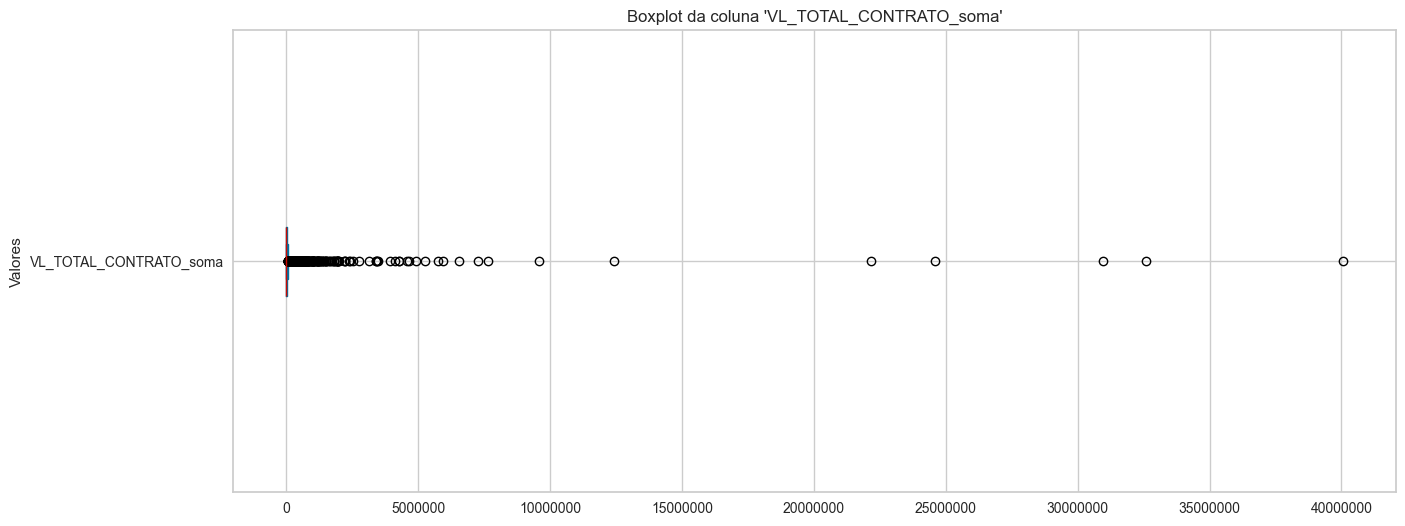

In [232]:
# Boxplot dovalor total do contrato

plt.figure(figsize=(15, 6))
df_agrupado['VL_TOTAL_CONTRATO_soma'].plot.box(vert=False)
plt.title(f"Boxplot da coluna 'VL_TOTAL_CONTRATO_soma'")
plt.ylabel("Valores")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

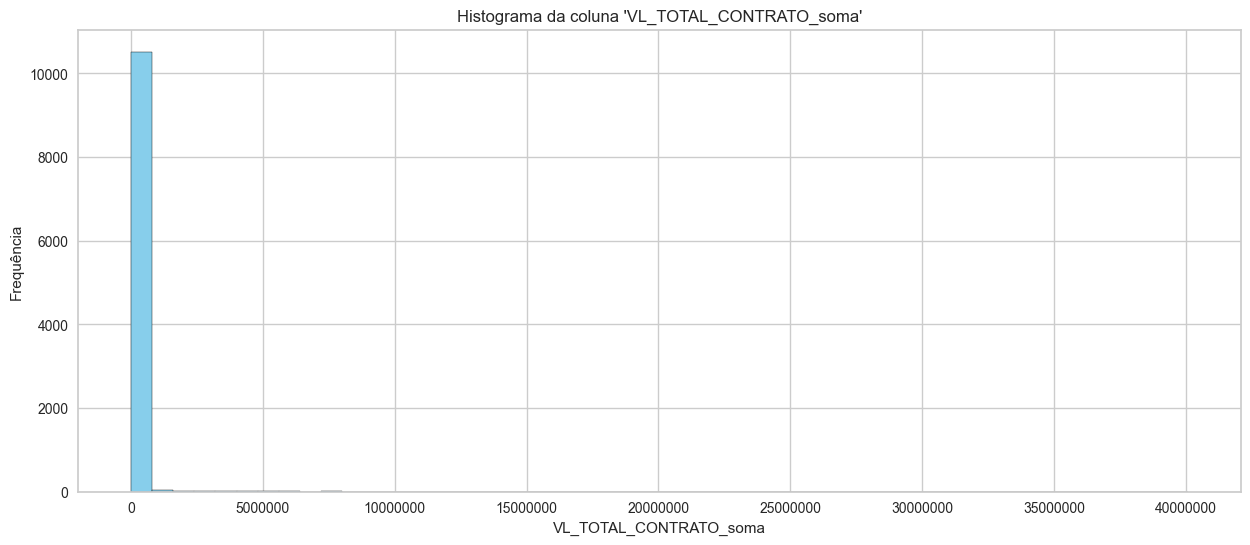

In [233]:
# Plotar histograma do valor total do contrato


plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black")
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

In [234]:
# Percentual de outliers

# Quartis
Q1 = df_agrupado["VL_TOTAL_CONTRATO_soma"].quantile(0.25)
Q3 = df_agrupado["VL_TOTAL_CONTRATO_soma"].quantile(0.75)
IQR = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers
outliers_inferiores = df_agrupado[df_agrupado["VL_TOTAL_CONTRATO_soma"] < limite_inferior].shape[0]
outliers_superiores = df_agrupado[df_agrupado["VL_TOTAL_CONTRATO_soma"] > limite_superior].shape[0]
total = df_agrupado.shape[0]

# Percentual
percent_inferiores = outliers_inferiores / total * 100
percent_superiores = outliers_superiores / total * 100

print(f"Outliers inferiores: {percent_inferiores:.2f}%")
print(f"Outliers superiores: {percent_superiores:.2f}%")

Outliers inferiores: 0.00%
Outliers superiores: 13.18%


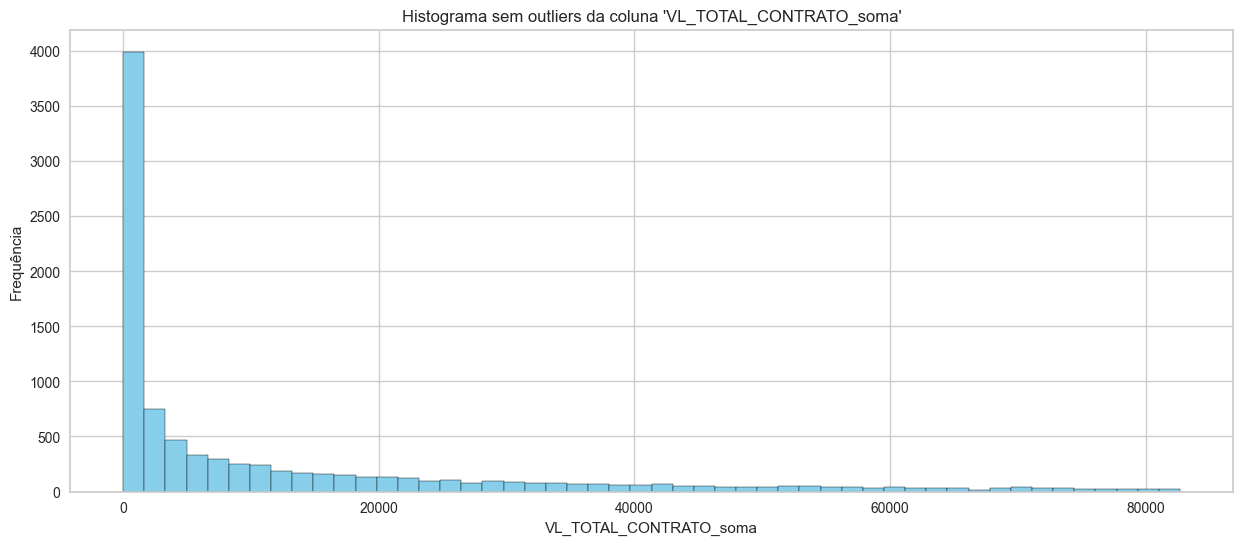

In [235]:
# Histograma sem outliers

plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black", range=(0, limite_superior))
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma sem outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

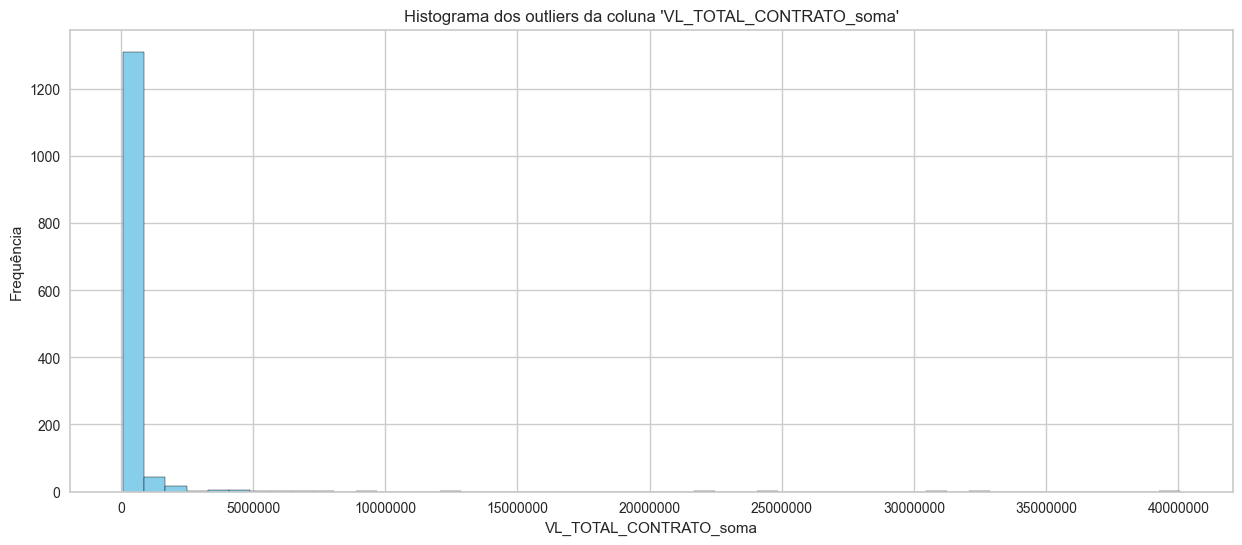

In [236]:
# Histograma dos outliers

max_valor = df_agrupado["VL_TOTAL_CONTRATO_soma"].max()

plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black", range=(limite_superior, max_valor))
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma dos outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

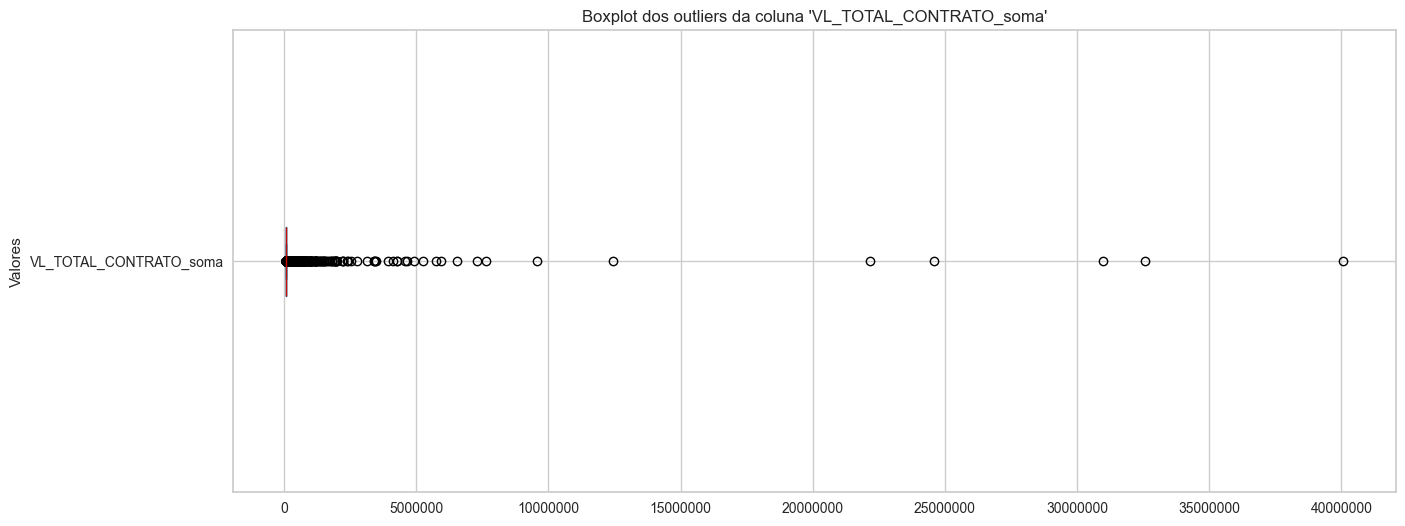

In [237]:
# Boxplot dos outliers

plt.figure(figsize=(15, 6))
df_agrupado['VL_TOTAL_CONTRATO_soma'].clip(limite_superior, max_valor).plot.box(vert=False)
plt.title(f"Boxplot dos outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
plt.ylabel("Valores")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

In [238]:
# Dividindo os valores de contrato em faixas

# Definir o tamanho da faixa (1 milhão)
tamanho_faixa = 500_000

# Determinar valor máximo da coluna
max_valor = df_agrupado["VL_TOTAL_CONTRATO_soma"].max()

# Criar limites automaticamente: de 0 até o próximo milhão acima do máximo
limites = np.arange(0, max_valor + tamanho_faixa, tamanho_faixa)

# Criar rótulos das faixas
labels = [f"{int(l/500_000)*0.5}-{int(limites[i+1]/500_000)*0.5}M" for i, l in enumerate(limites[:-1])]

# Criar a coluna com as faixas
df_agrupado["faixa_vl_total_soma_contratos"] = pd.cut(df_agrupado["VL_TOTAL_CONTRATO_soma"], bins=limites, labels=labels, include_lowest=True)

In [239]:
# Exibindo o número de clientes por faixa

df_faixas_contrato = df_agrupado.groupby('faixa_vl_total_soma_contratos').agg({'CD_CLIENTE': 'count'})

df_faixas_contrato['percentual'] = df_faixas_contrato['CD_CLIENTE']/len(df_agrupado)*100

df_faixas_contrato

C:\Users\gxmar\AppData\Local\Temp\ipykernel_18528\1670929586.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_faixas_contrato = df_agrupado.groupby('faixa_vl_total_soma_contratos').agg({'CD_CLIENTE': 'count'})


,CD_CLIENTE,percentual
faixa_vl_total_soma_contratos,,
0.0-0.5M,10440,98.351390
0.5-1.0M,98,0.923222
1.0-1.5M,26,0.244936
1.5-2.0M,18,0.169571
2.0-2.5M,6,0.056524
...,...,...
38.0-38.5M,0,0.000000
38.5-39.0M,0,0.000000
39.0-39.5M,0,0.000000


In [240]:
percentual_nulos = df_agrupado.isnull().mean() * 100
percentual_nulos

CD_CLIENTE                       0.0
DS_PROD_moda                     0.0
DS_LIN_REC_moda                  0.0
CIDADE_moda                      0.0
DS_CNAE_moda                     0.0
DS_SEGMENTO_moda                 0.0
DS_SUBSEGMENTO_moda              0.0
MARCA_TOTVS_moda                 0.0
MODAL_COMERC_moda                0.0
PAIS_moda                        0.0
PERIODICIDADE_moda               0.0
UF_moda                          0.0
VL_TOTAL_CONTRATO_soma           0.0
faixa_vl_total_soma_contratos    0.0
dtype: float64

In [241]:
# Convertendo codigo do pais para string
df_agrupado['PAIS_moda'] = df_agrupado['PAIS_moda'].astype(str)

In [242]:
# Normalizando a coluna do valor total dos contratos
#scaler = MinMaxScaler()
#df_agrupado[['VL_TOTAL_CONTRATO_soma']] = scaler.fit_transform(df_agrupado[['VL_TOTAL_CONTRATO_soma']])

# Adicionando Dados de Outros Datasets

## clientes_desde

In [ ]:
df_clientes_desde = pd.read_csv('../dados/dados_totvs/clientes_desde.csv', sep=';')

In [244]:
# Converter string -> datetime
df_clientes_desde["CLIENTE_DESDE"] = pd.to_datetime(
    df_clientes_desde["CLIENTE_DESDE"], format="%Y-%m-%d", errors="coerce"
)

In [245]:
# Calcular diferença em dias até hoje
df_clientes_desde["DIAS_CLIENTE"] = (
    pd.Timestamp.today().normalize() - df_clientes_desde["CLIENTE_DESDE"]
).dt.days.astype("Int64")  # Int64 aceita nulos

In [246]:
df_clientes_desde = df_clientes_desde.drop("CLIENTE_DESDE", axis=1)

In [247]:
df_clientes_desde.rename(columns={"CLIENTE": "CD_CLIENTE"}, inplace=True)

In [248]:
df_agrupado = pd.merge(
    df_agrupado, 
    df_clientes_desde, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [249]:
df_agrupado['DIAS_CLIENTE'].isnull().sum()

np.int64(0)

## contratacoes_ultimos_12_meses

In [ ]:
df_contratacoes_ultimos_12_meses = pd.read_csv('../dados/dados_totvs/contratacoes_ultimos_12_meses.csv', sep=';')

In [251]:
df_contratacoes_ultimos_12_meses['VLR_CONTRATACOES_12M'] = df_contratacoes_ultimos_12_meses['VLR_CONTRATACOES_12M'].str.replace(",", ".").astype(float)

In [252]:
df_agrupado = pd.merge(
    df_agrupado, 
    df_contratacoes_ultimos_12_meses, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [253]:
df_agrupado[['QTD_CONTRATACOES_12M', 'VLR_CONTRATACOES_12M']].isnull().sum()

QTD_CONTRATACOES_12M    6301
VLR_CONTRATACOES_12M    6301
dtype: int64

In [254]:
df_agrupado[["QTD_CONTRATACOES_12M", "VLR_CONTRATACOES_12M"]] = (
    df_agrupado[["QTD_CONTRATACOES_12M", "VLR_CONTRATACOES_12M"]].fillna(0)
)

## historico

In [ ]:
# deixar dados de fora? o que significam?

## mrr

In [ ]:
df_mrr = pd.read_csv('../dados/dados_totvs/mrr.csv', sep=';')

In [256]:
df_mrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309 entries, 0 to 7308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLIENTE  7309 non-null   object 
 1   MRR_12M  7309 non-null   float64
dtypes: float64(1), object(1)
memory usage: 114.3+ KB


In [257]:
df_mrr.nunique()

CLIENTE    7309
MRR_12M    7151
dtype: int64

In [258]:
df_mrr.rename(columns={"CLIENTE": "CD_CLIENTE"}, inplace=True)

In [259]:
df_agrupado = pd.merge(
    df_agrupado, 
    df_mrr, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [260]:
df_agrupado['MRR_12M'].isnull().sum()

np.int64(3306)

In [264]:
df_agrupado['MRR_12M'].isnull().sum()/len(df_agrupado) * 100

np.float64(31.144606688648143)

In [ ]:
# O que fazer com clientes sem MRR? Colocar 0?

# Tratamento Final

In [ ]:
# Normalizar colunas numéricas?

In [330]:
# Criando df para controle
df_agrupado_2 = df_agrupado.copy()

# Avaliando o Número Inicial de K para Kmeans

In [331]:
# Função para exibir as diferentes avaliações para o número de clusters

def define_numero_clusters(x):
    # Elbow method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,30))
    visualizer.fit(x)
    visualizer.show()

    # Silhouette method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=True)
    visualizer.fit(x)
    visualizer.show()

    # Calinski harabaz method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz', timings=True)
    visualizer.fit(x)
    visualizer.show()

In [332]:
features = df_agrupado.columns.tolist()
features.remove('CD_CLIENTE')

x = df_agrupado[features].values

#define_numero_clusters(x)

# Pipeline de Clusterização com Kprototype

In [335]:
# Função para visualização dos clusters
def visualiza_clusters(x, labels):
    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set2', s=50)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Clusters (PCA)")
    plt.show()

    # TSNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(x)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Set2', s=50)
    plt.title("Clusters (t-SNE)")
    plt.show()

In [336]:
# Função para visualização da distribuiçlão dos valores de cada coluna por cluster

def visualiza_colunas_por_cluster(df, k):
    colunas_graficos = ['DS_LIN_REC_moda', 'DS_SEGMENTO_moda', 'UF_moda', 'faixa_vl_total_soma_contratos']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # grid 2x2
    axes = axes.flatten()  # transforma os eixos em array 1D para iterar facilmente

    for i, coluna in enumerate(colunas_graficos):
        contagem = pd.crosstab(df[coluna], df[f"cluster_{k}"])
        contagem.plot(kind="bar", stacked=True, colormap="Set2", ax=axes[i])

        axes[i].set_xlabel(coluna)
        axes[i].set_ylabel("Contagem")
        axes[i].set_title(f"Contagem de {coluna} por cluster para k={k}")
        axes[i].legend(title="Cluster")

    plt.tight_layout()  # ajusta espaçamento entre os gráficos
    plt.show()

In [337]:
# Função para exibir a contagem do número de clientes e valor total dos contratos
def mostra_contagem_clientes_casos(df, k):
    df_contagem_clientes_casos = df.groupby(f'cluster_{k}').agg({
        'CD_CLIENTE': 'count',
        'VL_TOTAL_CONTRATO_soma': ['sum', 'mean']
    }).reset_index()
    df_contagem_clientes_casos.columns = [f'cluster_{k}', 'numero_clientes', 'valor_total_contratos', 'media_total_contratos']
    with pd.option_context('display.float_format', '{:.2f}'.format):
        print(df_contagem_clientes_casos)

In [338]:
# Função para clusterazação com kprototype
def clusterização_kproto(x, k, init, categorical, max_iter=100):
    kproto = KPrototypes(n_clusters=k, init=init, max_iter=max_iter, verbose=1, random_state=42)
    kproto.fit(x, categorical=categorical)
    labels = kproto.labels_
    cluster_pred = kproto.predict(x, categorical=categorical)

    return kproto, labels, cluster_pred

In [339]:
# Função para avaliadção da clusterização do kprototype - a avaliação exige apenas valores numéricos
def avaliacao_clusterizacao_kproto(x, labels):
    # Cria uma cópia para não alterar o original
    x_temp = x.drop('CD_CLIENTE', axis=1).copy()
    # Identifica colunas categóricas (object ou category)
    colunas_categoricas = x_temp.select_dtypes(include=['object', 'category']).columns
    # Aplica frequency encoding nas colunas categóricas
    for coluna in colunas_categoricas:
        freq = x_temp[coluna].value_counts(normalize=True)
        x_temp[coluna] = x_temp[coluna].map(freq)
    # Calcula as métricas usando apenas valores numéricos
    x_numerico = x_temp.select_dtypes(include=[np.number])
    score = silhouette_score(x_numerico, labels)
    db_index = davies_bouldin_score(x_numerico, labels)
    ch_index = calinski_harabasz_score(x_numerico, labels)
    return score, db_index, ch_index

In [340]:
# Função para alimentar dataframe da avaliação da clusterização
def alimenta_df_avaliacao_clusterizacao_kproto(df_avaliacao, k, init, score, db_index, ch_index):
    df_avaliacao.loc[len(df_avaliacao)] = [k, init, score, db_index, ch_index]

In [333]:
# Redefinindo DFs (para rodar novamente os clusters se rodar todo o notebook)
df_agrupado = df_agrupado_2.copy()

In [334]:
# Criando dataset do modelo e transformando a coluna CD_CLIENTE em numérica para usar no KPrototypes

# Criando o dataset para alimentar o modelo
x = df_agrupado.copy()
# Transformando a coluna CD_CLIENTE em numérica para usar no KPrototypes
x['CD_CLIENTE'], id_map = pd.factorize(x['CD_CLIENTE'])

In [ ]:
# Definindo limite de k e parametros para teste

###############################################
k_max = 5
###############################################

valores_k = list(range(3, (k_max+1))) # min. 3 clusters
lista_init = ["Cao", "Huang"]

In [ ]:
# Transformando colunas de objetos em categoricas
for col in x.select_dtypes(include=['object']).columns:
    x[col] = x[col].astype('category')

In [343]:
# Separando colunas categoricas
categorical_idx = [x.columns.get_loc(col) for col in x.select_dtypes(include=['category']).columns]


Clusterização com k=3:

Clusterização com k=3, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1085, ncost: 3184330695697898.0
Run: 1, iteration: 2/100, moves: 669, ncost: 2023932429647999.8
Run: 1, iteration: 3/100, moves: 349, ncost: 919100124174067.1
Run: 1, iteration: 4/100, moves: 144, ncost: 617673305665822.5
Run: 1, iteration: 5/100, moves: 38, ncost: 561993689573318.2
Run: 1, iterat

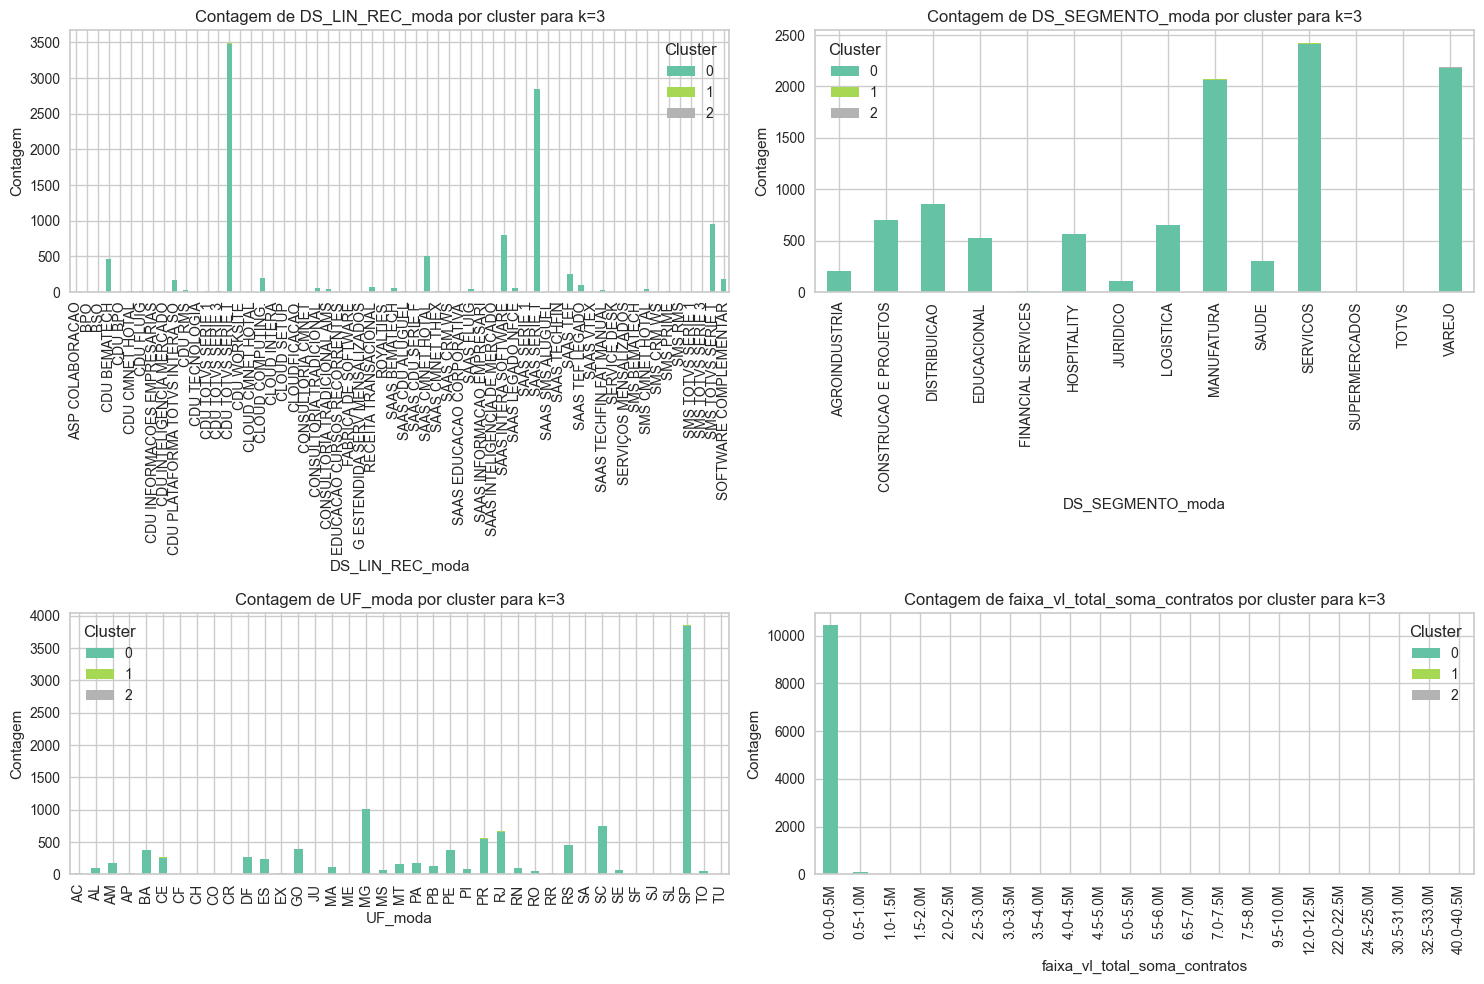


Clusterização com k=4:

Clusterização com k=4, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

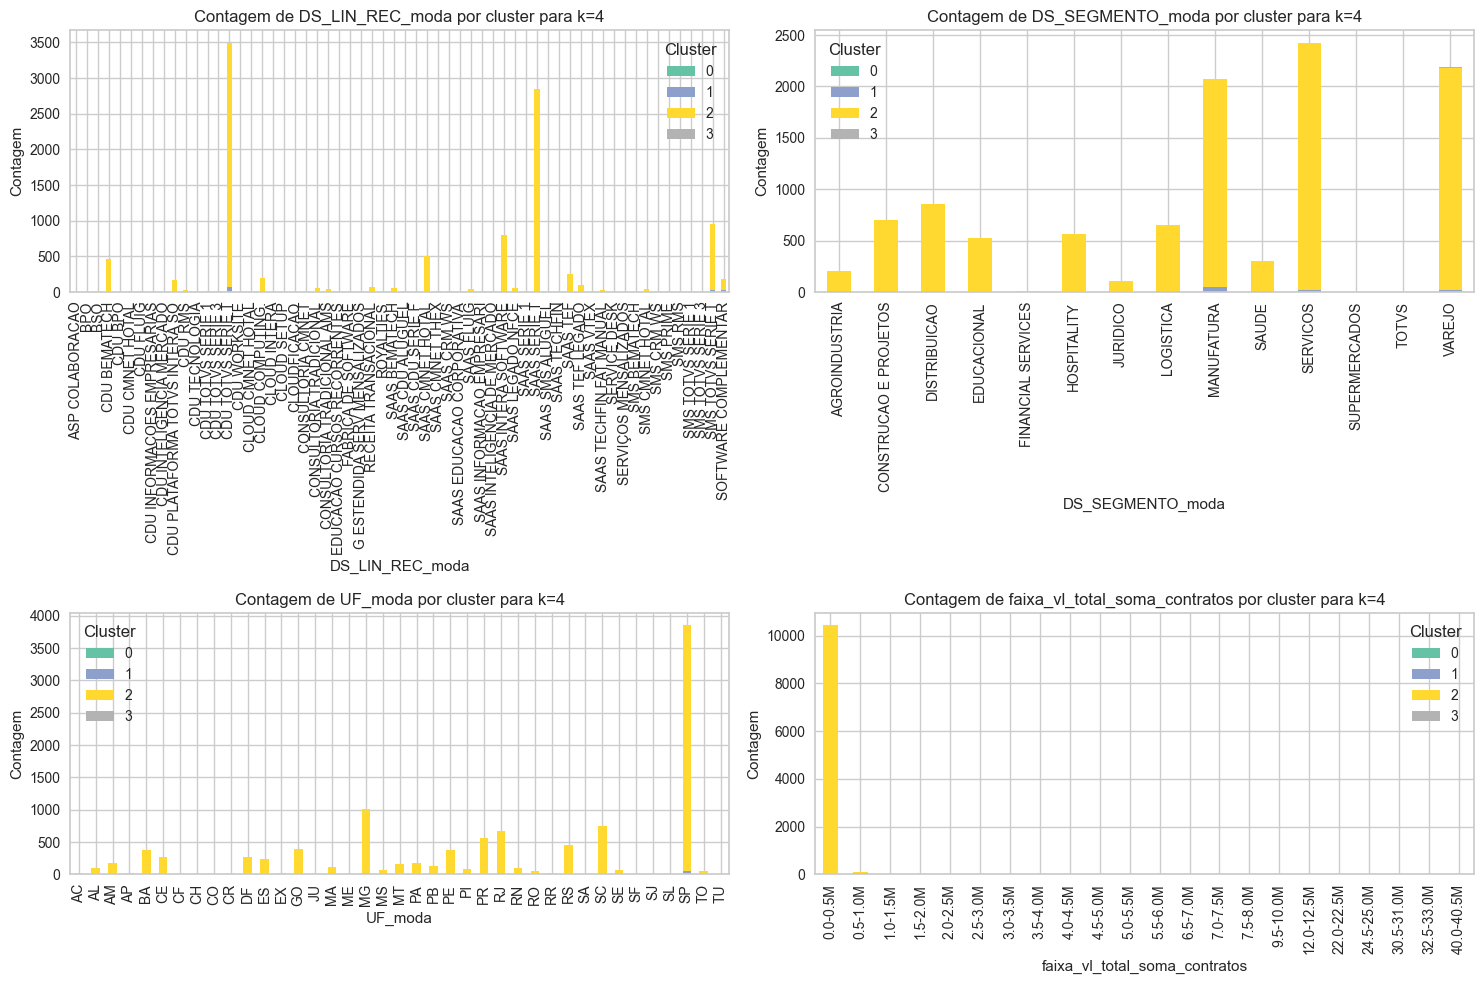


Clusterização com k=5:

Clusterização com k=5, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

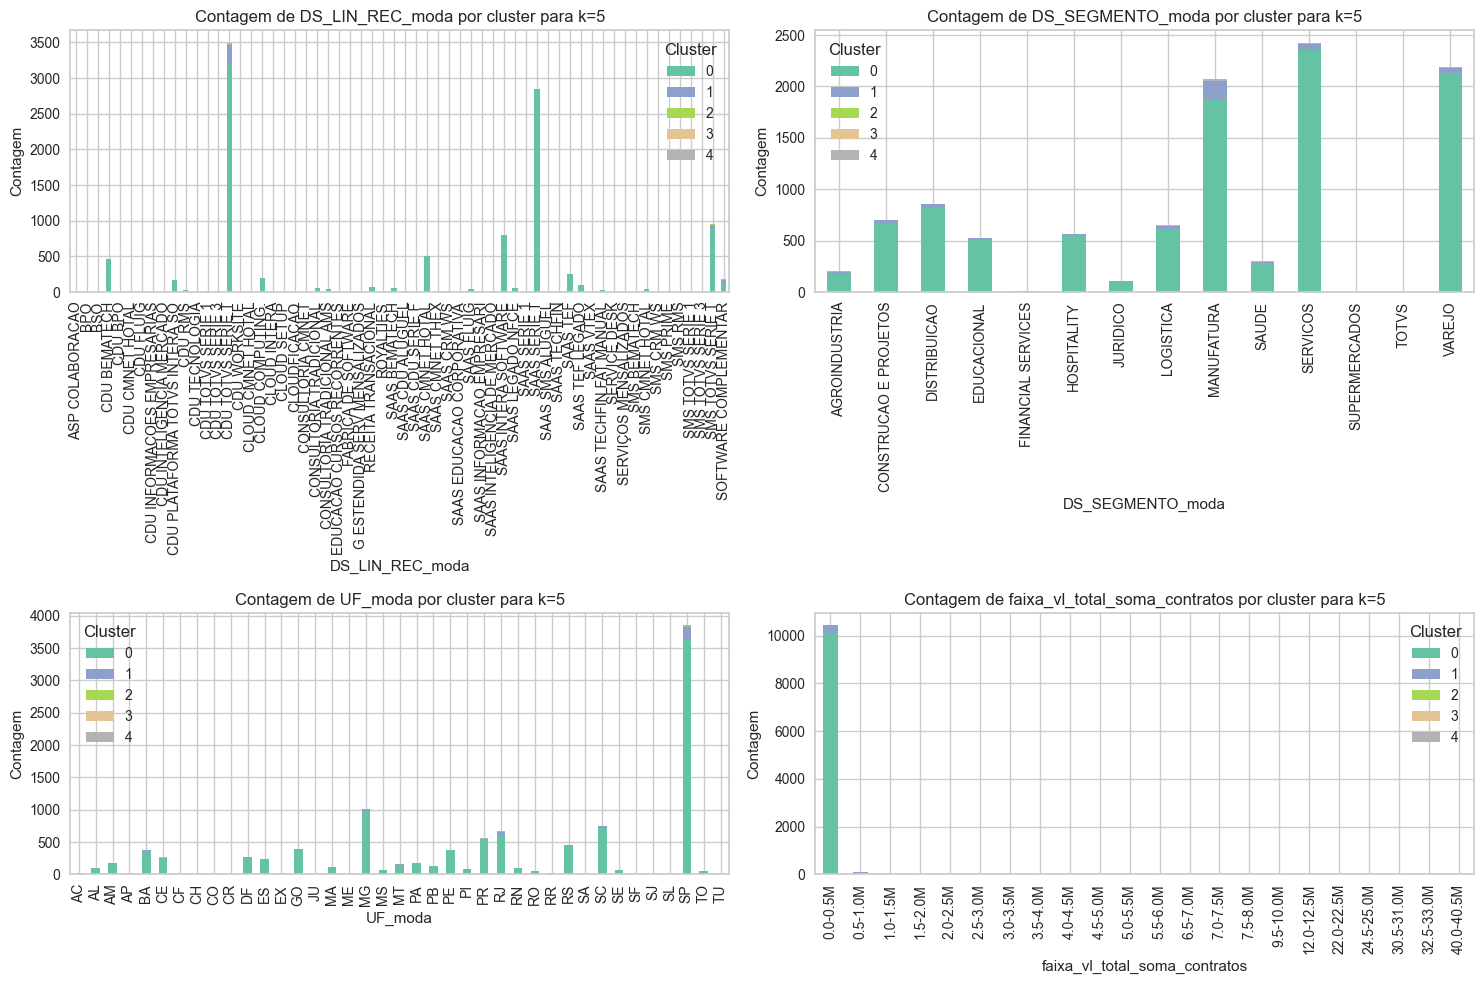


Comparação final entre os indicadores de cada clusterização:


Melhor k: 3 com base no silhouette score (0.9836).

   clusters   init  silhouette_score  davies_bouldin_score  \
0         3    Cao          0.983623              0.324952   
1         3  Huang          0.983623              0.324952   
2         4    Cao          0.937912              0.431199   
3         4  Huang          0.937912              0.431199   
4         5    Cao          0.879964              0.455113   
5         5  Huang          0.879964              0.455113   

   calinski_harabasz_score  
0             51375.864173  
1             51375.864173  
2             47154.347052  
3             47154.347052  
4             42350.931029  
5             42350.931029  


In [ ]:
# Pipeline de clusterização com diversos valores de k

# Lista com os nomes das colunas de avaliação
colunas_avaliacao = ["clusters", "init", "silhouette_score", "davies_bouldin_score", "calinski_harabasz_score"]

# Cria um DataFrame vazio para avaliação
df_avaliacao_2 = pd.DataFrame(columns=colunas_avaliacao)

best_score_overall = 0
best_k_overall = 0

for k in valores_k:
    best_score = 0
    best_labels = None
    print(f"\nClusterização com k={k}:\n")
    for init in lista_init:
        # Clusterização
        print(f"Clusterização com k={k}, init={init}")
        kproto, labels, cluster_pred = clusterização_kproto(x, k, init, categorical_idx)

        # Alimentando o df de avaliação geral dos clusters
        score, db_index, ch_index = avaliacao_clusterizacao_kproto(x, labels)
        print(f"Silhouette Score: {score:.4f}, Davies-Bouldin Index: {db_index:.4f}, Calinski-Harabasz Index: {ch_index:.4f}\n")
        alimenta_df_avaliacao_clusterizacao_kproto(df_avaliacao_2, k, init, score, db_index, ch_index)

        # Usando o sihlouette score para atribuir o melhor modelo dentro de cada k
        if best_score == 0:
            best_score = score
            best_labels = labels
        elif score > best_score:
            best_score = score
            best_labels = labels

    #print(f"\nVisualização da clusterização com {k} clusters:\n")
    #visualiza_clusters(x, labels, k)

    # Alimentando os dfs originais com os clusters 
    df_agrupado[f"cluster_{k}"] = best_labels # df para alimentar o modelo

    # Exibição no número de clientes e casos por cluster
    print(f"\nNúmero de clientes ,valor total e média dos contratos totais por cluster para k={k}:\n")
    mostra_contagem_clientes_casos(df_agrupado, k)

    # Gerando os gráficos de distribuiução dos valores de cada coluna por cluster
    print(f"\nGráficos de distribuição para k={k}:\n")
    visualiza_colunas_por_cluster(df_agrupado, k)

    if best_score > best_score_overall:
        best_score_overall = best_score
        best_k_overall = k

# Exibindo df com a avaliação da clusterização
print("\nComparação final entre os indicadores de cada clusterização:\n")
print(f"\nMelhor k: {best_k_overall} com base no silhouette score ({best_score_overall:.4f}).\n")
print(df_avaliacao_2)

silhouette_score: quanto maior, melhor

davies_bouldin_score : quanto menor, melhor

calinski_harabasz_score: quanto maior, melhor

In [345]:
df_avaliacao_2

,clusters,init,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,3,Cao,0.983623,0.324952,51375.864173
1,3,Huang,0.983623,0.324952,51375.864173
2,4,Cao,0.937912,0.431199,47154.347052
3,4,Huang,0.937912,0.431199,47154.347052
4,5,Cao,0.879964,0.455113,42350.931029
5,5,Huang,0.879964,0.455113,42350.931029
